In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
pd.set_option('display.max_columns', 100)

In [4]:
df_taxi = pd.read_csv('../input/green_tripdata_2015-09.csv')

In [5]:
type(df_taxi['Dropoff_latitude'][0])

numpy.float64

In [6]:
# df_taxi.columns

#### Creating Trip_time column. Here time is in seconds.

In [7]:
t1 = pd.to_datetime(df_taxi['lpep_pickup_datetime'])
t2 = pd.to_datetime(df_taxi['Lpep_dropoff_datetime'])
df_taxi['Trip_time']=(t2-t1).astype('timedelta64[s]')
df_taxi['Trip_time'].head()

0      4.0
1      4.0
2    154.0
3    246.0
4    246.0
Name: Trip_time, dtype: float64

# <font color='darkred'>Question 1</font>

## <font color='darkred'>•Programmatically download and load into your favorite analytical tool the trip data for September 2015.</font>


## <font color='darkred'> •Report how many rows and columns of data you have loaded.</font>

## <font color='blue'>Answer:   Rows: 1494926  and  Columns: 21</font> 

In [8]:
df_taxi.shape

(1494926, 22)

In [9]:
print("Number of Rows are : ",df_taxi.shape[0])
print("Number of Columns are : ",df_taxi.shape[1])

Number of Rows are :  1494926
Number of Columns are :  22


# <font color='darkred'>Question 2</font>

# <font color='darkred'>• Plot a histogram of the number of the trip distance (“Trip Distance”).</font>

# <font color='darkred'>• Report any structure you find and any hypotheses you have about that structure.</font>

### Number of 0 distance Trips : 20,592

In [10]:
# df_taxi['Trip_distance'].value_counts()

### So there were nearly 20,592 trips which travelled no distance at all. For simplicity, lets keep those as an insight and remove those outliers. Also nearly 97.68% of data is between 0 and 15. So we will plot histogram of this much data.

In [11]:
(df_taxi[ (df_taxi['Trip_distance']>25) & (df_taxi['Trip_distance']<2500) ].shape[0])/(df_taxi).shape[0]

0.0008194385541491686

# <font color='darkred'>Q2.A • Plot a histogram of the number of the trip distance (“Trip Distance”).</font>



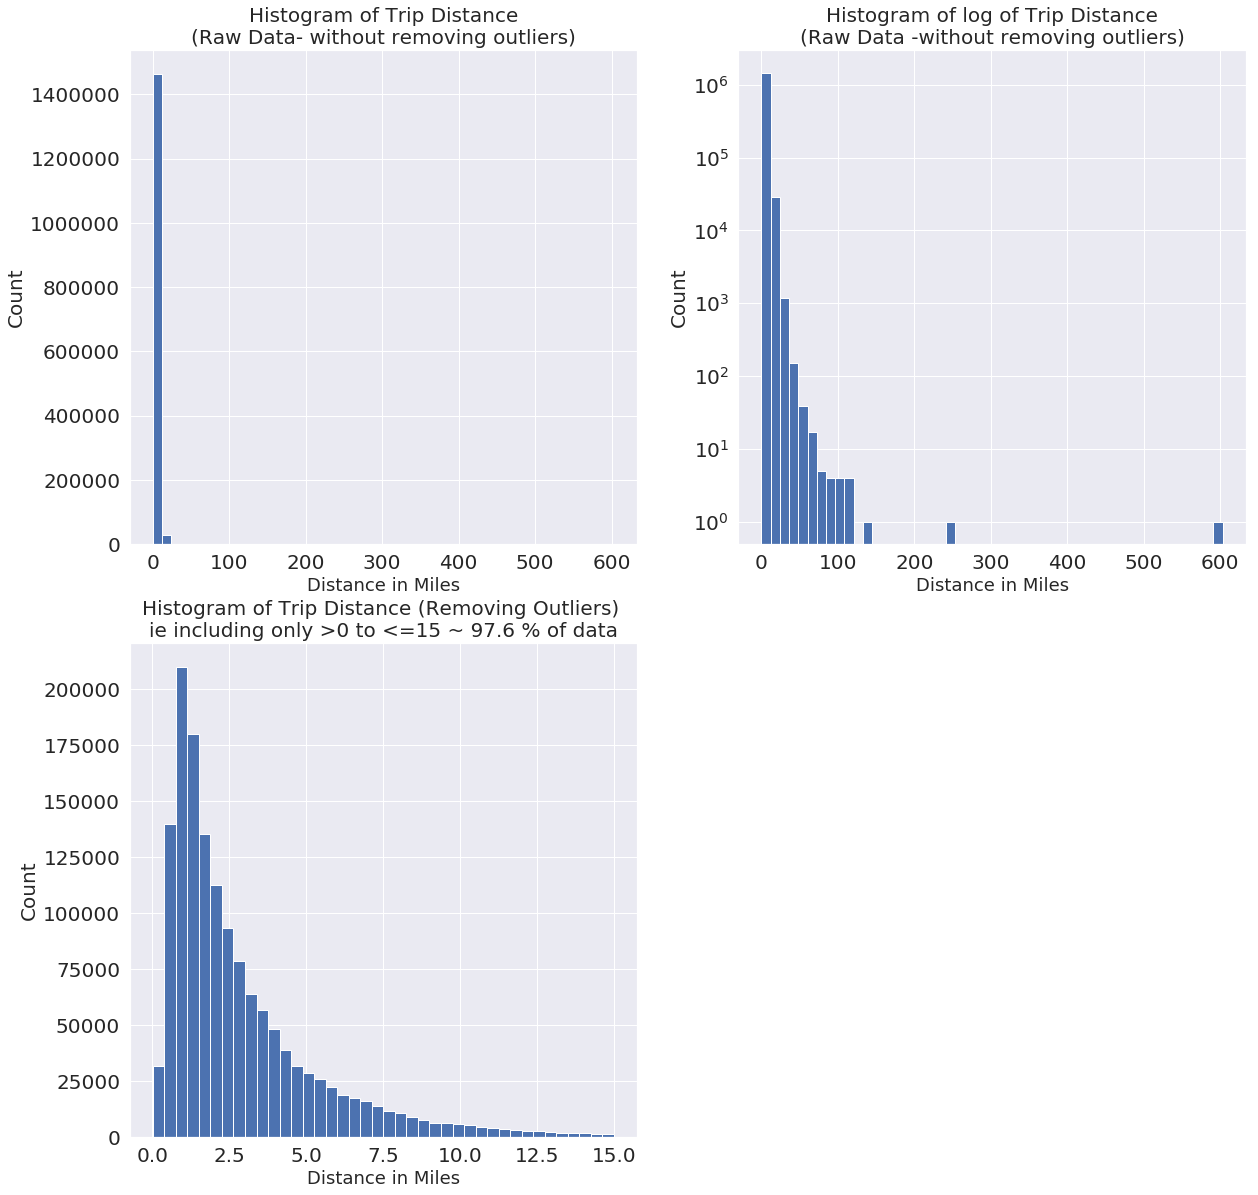

In [12]:
import seaborn as sns
import matplotlib.mlab as mlab
import scipy.stats as stat
import matplotlib

sns.set()
matplotlib.rc('xtick', labelsize=20)     
matplotlib.rc('ytick', labelsize=20)
plt.figure(1,figsize=(20,20))

plt.subplot(221)
plt.hist(df_taxi['Trip_distance'],bins=50)
plt.title('Histogram of Trip Distance\n(Raw Data- without removing outliers)',size=20)
plt.xlabel("Distance in Miles",size=18)
plt.grid(True)
plt.ylabel("Count",size=20)


plt.subplot(222)
plt.hist(df_taxi['Trip_distance'],log=True,bins=50)
plt.title('Histogram of log of Trip Distance\n(Raw Data -without removing outliers)',size=20)
plt.xlabel("Distance in Miles",size=18)
plt.ylabel("Count",size=20)
plt.grid(True)

df_taxi_subset1 = df_taxi[(df_taxi['Trip_distance'] >0) & (df_taxi['Trip_distance'] <= 15)]

plt.subplot(223)
plt.hist(df_taxi_subset1['Trip_distance'],bins=40)
plt.title('Histogram of Trip Distance (Removing Outliers) \nie including only >0 to <=15 ~ 97.6 % of data',size=20)
plt.xlabel("Distance in Miles",size=18)
plt.ylabel("Count",size=20)
plt.grid(True)

plt.show()

### 1. Raw data of Trip_distance is plotted.(Without removing outliers)
### 2. Logarithm of Trip_distance is plotted.(Without removing outliers)
### 3. Removing Outliers(trip_distance=0 and trip_distance>15) and then plotting histogram.

# <font color='darkred'>Q2.B • Report any structure you find and any hypotheses you have about that structure.</font>

# <font color='blue'> • Insights and Hypothesis:

># <font color='blue'>• Statistical Inference: </font>
>> ###   <font color='blue'>    • Trip Distance is clearly Right Skewed ie it has mean greater than the median and it is Assymetric in nature.
>> ###   <font color='blue'>   • The distribution has a "structure of LogNormal Distribution".
>>###    <font color='blue'>   • There are nearly 20,500 zero distance trips.
>>###   <font color='blue'>     
> # <font color='blue'> • Qualitative Inferences:
>>###    <font color='blue'>    • Most of the people taking taxi travel less distance ie. 
>>>####    <font color='blue'>        • 83% people travel distance less than 5 miles in taxi  
>>>####     <font color='blue'>       • 12.6% people travel between 5 and 10 miles
>>>####    <font color='blue'>        • 3.5% people travel between 10 and 25 miles 
>>>####   <font color='blue'>         • 0.08% people travel more than 25 miles which is too much rare.
>>###   <font color='blue'>     • There are 10 trips with > 100 miles distance, out of which extreme two are 603 miles and 246 miles respectively.
>>####     <font color='blue'>   
 

# <font color='darkred'> Question 3
## <font color='darkred'>• Report mean and median trip distance grouped by hour of day.

## <font color='darkred'>• We’d like to get a rough sense of identifying trips that originate or terminate at one of the NYC area airports. Can you provide a count of how many transactions fit this criteria, the average fare, and any other interesting characteristics of these trips.

In [13]:
### Creating time (in Hour) column

In [14]:
import datetime
df_taxi['hour']=[ t.hour for t in pd.to_datetime(df_taxi['lpep_pickup_datetime'])]
df_taxi['hour'].tail()

1494921    23
1494922    23
1494923    23
1494924    23
1494925    23
Name: hour, dtype: int64

In [15]:
df_taxi.columns

Index(['VendorID', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime',
       'Store_and_fwd_flag', 'RateCodeID', 'Pickup_longitude',
       'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude',
       'Passenger_count', 'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax',
       'Tip_amount', 'Tolls_amount', 'Ehail_fee', 'improvement_surcharge',
       'Total_amount', 'Payment_type', 'Trip_type ', 'Trip_time', 'hour'],
      dtype='object')

## <font color='darkred'>Q3.A • Report mean and median trip distance grouped by hour of day.


# <font color='blue'> Answer 3.A : Mean and Median Trip Distance Grouped by Hour of the day are in below Data Frame

In [16]:
df_hour=pd.DataFrame()
df_hour['Hour']=range(0,24)
df_hour['Mean_distance']=df_taxi.groupby('hour').mean()['Trip_distance']
df_hour['Median_distance']=df_taxi.groupby('hour').median()['Trip_distance']
df_hour.head()

,Hour,Mean_distance,Median_distance
0,0,3.115276,2.20
1,1,3.017347,2.12
2,2,3.046176,2.14
3,3,3.212945,2.20
4,4,3.526555,2.36


## <font color='blue'> 3.A (Continued) Graphs Representing Mean, Median and Hour of the day.


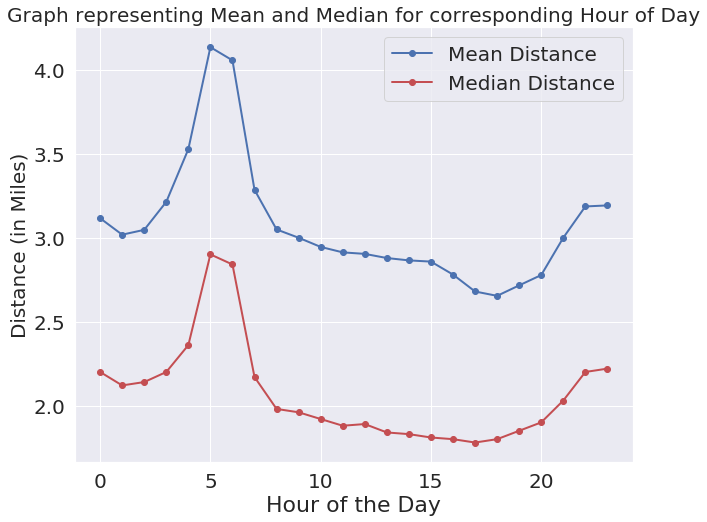

In [17]:
plt.figure(figsize=(10,8))
plt.plot(df_hour['Hour'],df_hour['Mean_distance'],'bo-',linewidth=2,label='Mean Distance')
plt.plot(df_hour['Hour'],df_hour['Median_distance'],'ro-',linewidth=2,label='Median Distance')
plt.legend(loc='upper right',fontsize=20)
plt.title('Graph representing Mean and Median for corresponding Hour of Day',size=20)
plt.xlabel("Hour of the Day",size=22)
plt.ylabel("Distance (in Miles)",size=20)
plt.grid(True)


## <font color='blue'> Inference from above graph:
>###    <font color='blue'>• There are more long distance trips in morning 5 AM to 6 AM as compared to whole day.
>###  <font color='blue'> • Also we can see that morning mean and median trips are much longer than as compared to evening trips. This might be due to reason that people might be taking taxi in morning if they do not want to be late to work and in evening they take more public transportation. It might be any other case too.

## <font color='darkred'>Q3.B • We’d like to get a rough sense of identifying trips that originate or terminate at one of the NYC area airports. Can you provide a count of how many transactions fit this criteria, the average fare, and any other interesting characteristics of these trips.

## <font color='blue'>I have taken three airports into consideration and Logitudes and Latitudes are found from google maps. The references are also given below.   
   
|Latitude                      |     Longitude        |                           Airport         |                         
 |-|-|-|
|40.6551573                 |   -73.7800813   |                      John F Kennedy (JFK)             |                   
|40.6884901       |-74.1743015        |     Newark (EWR) across the river from Manhattan in New Jersey            
|40.77262         |    -73.8759       | La Guardia (LGA) in the Queens borough of NYC               |              


References: Latitudes and Longitudes from Google Maps Coordinates
https://www.google.com/maps/place/John+F.+Kennedy+International+Airport/@40.6551573,-73.7800813,5459m/data=!3m1!1e3!4m5!3m4!1s0x89c26650d5404947:0xec4fb213489f11f0!8m2!3d40.641312!4d-73.7781394?hl=en-US
https://www.google.com/maps/place/Newark+Liberty+International+Airport/@40.6895232,-74.1752402,341m/data=!3m1!1e3!4m12!1m6!3m5!1s0x89c252e1c5ec0cef:0xb3f3b437c5d7f286!2sNewark+Liberty+International+Airport!8m2!3d40.6895314!4d-74.1744624!3m4!1s0x89c252e1c5ec0cef:0xb3f3b437c5d7f286!8m2!3d40.6895314!4d-74.1744624?hl=en-US
https://www.google.com/maps/search/La+Guardia+(LGA)+in+the+Queens/@40.77262,-73.8759,1362m/data=!3m1!1e3?hl=en-US

### <font color='blue' > Approach:  We will take small area around the latitide and longitudes to get an average of all the taxi that dropped off to and picked up from near airport and not only exact  coordinates of airport because all taxis pickup and drop around airport (near parking, etc..).

### <font color='blue' > Note that I could also have used RateCodeId = 2 and 3 which involves JFK and Newark, but it was "NEVER MENTIONED" in documentation that those rateCodeID=2 "involves trips from JFK". In short, we had some incomplete informations regarding RateCodeID. So I decided not to use it.

### I have used compact Numpy Vectorization to perform operation on whole DataFrame to calculate Which trips involve pickup or drop off to Airport.

In [1]:
airportlist2=[]

a=pd.DataFrame()
a['Pickup_latitude']=df_taxi['Pickup_latitude'].copy()
a['Dropoff_latitude']=df_taxi['Dropoff_latitude'].copy()
a['Pickup_longitude']=df_taxi['Pickup_longitude'].copy()
a['Dropoff_longitude']=df_taxi['Dropoff_longitude'].copy()
a.head()
a=np.array(a)
x=((a[:,0] > 40.63899) & (a[:,0] < 40.666573) & (a[:,2] > -73.810) & (a[:,2]< -73.77500)) | ((a[:,1] > 40.63899) & (a[:,1] < 40.666573) & (a[:,3] > -73.81199) & (a[:,3] <-73.77500))
airportlist2=[1]
airportlist3=['None' for x in range(0,len(a))]
airportlist2=np.multiply(airportlist2,x)
for p in range(0,len(airportlist2)):
    if(airportlist2[p]==1):
        airportlist3[p]='JFK'
x=((a[:,0] > 40.66994) & (a[:,0] < 40.70669) & (a[:,2] > -74.1959) & (a[:,2]<-74.1509)) | ((a[:,1] > 40.66994) & (a[:,1]<40.70669) & (a[:,3]> -74.1959) & (a[:,3]<-74.1509))

airportlist2=[1]
airportlist2=np.multiply(airportlist2,x)
for p in range(0,len(airportlist2)):
    if(airportlist2[p]==1):
        airportlist3[p]='EWR'
x=((a[:,0] > 40.7659) &  (a[:,0]< 40.7830) &  (a[:,2] >-73.889) & (a[:,2]<-73.8500 )) | ((a[:,1] > 40.7659) & (a[:,1] <40.7830) & (a[:,3] > -73.889) & (a[:,3]<-73.8500))

airportlist2=[1]
airportlist2=np.multiply(airportlist2,x)
for p in range(0,len(airportlist2)):
    if(airportlist2[p]==1):
        airportlist3[p]='LGA'



In [19]:
df_taxi['Airport']=airportlist3
df_taxi['Airport'].value_counts()

None    1454711
LGA       25715
JFK       13775
EWR         725
Name: Airport, dtype: int64

## <font color='darkred'> Can you provide a count of how many transactions fit this criteria?

## <font color='blue'> Please find below the approximate number of count that indicates number of drop off or pick up at any of the three given airports.
    
    
 |  Airport |Number of Trips|
|   -|-|
|LGA   |    25,715|
|JFK   |    13,775|
|EWR   |      725|
| None |   1,454,711|

In [20]:
df_taxi['Airport'].value_counts()

None    1454711
LGA       25715
JFK       13775
EWR         725
Name: Airport, dtype: int64

# <font color='darkred'> The average fare and any other interesting characteristics of these trips.

### <font color='blue'>There were many insights from Data that were noticed. They are:
 
### <font color='blue'>Comparison between Airport Trips and Rest all Trips. 

|Feature|Airport Trips| Non Airport Trips|
|-|-|-|
|Fare Amount|28.00|12.54|
|Total Amount |33.91 |15.03|
|Tip Amount  |3.74| 1.23|
|Trip Distance| 8.73 |2.96 |
|Trip Time | 1700.67 | 1215.75|
|Payment type-Credit card |65% |52%|


> ### <font color='blue'> We can clearly see that Average Fare Amount, Total Amount, Tip Amount, Trip Distance and Trip Time are more for airports and less for Non Airport trips.
 


|Airport| Tolls_amount|Trip_distance|Fare_amount|Extra|Tip_%|Trip_time|
|-|-|-|-|-|-|-|
|EWR   |  9.545710|20.35|75.72|0.193|11.02|3244.25|
|JFK    | 0.975228|13.41|40.62|0.202|9.38|2376.71|
|LGA     |1.019293|5.90 |19.90|0.263|9.75|1295.01|
|None    |0.094498|2.80 |12.11|0.354|6.55|1202.35|


### <font color='blue'> It can be inferred from above that EWR is far away from NYC core city which leads to higher Fare, higher Toll, higher Trip time and higher tips. BUT WAIT!!! There is a interesting characteristic here!  EWR has lowest Extra as compared to other trips. So Why is that? 

> ### <font color='blue'>It is lowest for EWR and highest for Non Airport trips because Extras include Rush Hour and Over night charges which are not possible mostly on Airport highways because the Rush Hour would effect city roads and not Airport Highways and Over night charges are also less for Airport People because people generally have tendency to go airport and take flight during day time instead of night time. Though sometimes there might be negligible weight of overnight charges for airports but not more than inside city.

In [21]:
# Average Fare of All trips vs Average Fare of Airport Trips
print("Average fare Amount for ALL TRIPS ",df_taxi['Fare_amount'].mean())

print("Average fare Amount for AIRPORT TRIPS ",df_taxi[df_taxi['Airport']!='None']['Fare_amount'].mean())
# Total Fare of All trips vs Total Fare of Airport Trips
print("Average Total Amount for ALL TRIPS ",df_taxi['Total_amount'].mean())

print("Average Total Amount for AIRPORT TRIPS ",df_taxi[df_taxi['Airport']!='None']['Total_amount'].mean())
# Tip Amount of All trips vs Tip Amount of Airport Trips
print("Tip Amount for ALL TRIPS ",df_taxi['Tip_amount'].mean())

print("Tip Amount for AIRPORT TRIPS ",df_taxi[df_taxi['Airport']!='None']['Tip_amount'].mean())
# Trip Distance of All trips vs Trip Distance of Airport Trips
print("Trip Distance for ALL TRIPS ",df_taxi['Trip_distance'].mean())

print("Trip Distance for AIRPORT TRIPS ",df_taxi[df_taxi['Airport']!='None']['Trip_distance'].mean())
# Trip Time of All trips vs Trip Distance of Airport Trips
print("Trip Time for ALL TRIPS ",df_taxi['Trip_time'].mean())

print("Trip Time for AIRPORT TRIPS ",df_taxi[df_taxi['Airport']!='None']['Trip_time'].mean())
# Trip Time of All trips vs Trip Distance of Airport Trips
print("Payment Type for ALL TRIPS ",df_taxi['Payment_type'].value_counts())

print("Payment Type for AIRPORT TRIPS ",df_taxi[df_taxi['Airport']!='None']['Payment_type'].value_counts())
# df_taxi.groupby('Airport').mean()['Tolls_amount']
# df_taxi.groupby('Airport').mean()['Trip_distance']
# df_taxi.groupby('Airport').mean()['Fare_amount']
# df_taxi.groupby('Airport').mean()['Extra']
# df_taxi.groupby('Airport').mean()['Tip_%']
# df_taxi.groupby('Airport').mean()['Trip_time']

Average fare Amount for ALL TRIPS  12.54319751613129
Average fare Amount for AIRPORT TRIPS  28.006853910232493
Average Total Amount for ALL TRIPS  15.032145751981083
Average Total Amount for AIRPORT TRIPS  33.91363073481325
Tip Amount for ALL TRIPS  1.2357267048672937
Tip Amount for AIRPORT TRIPS  3.7494947159020917
Trip Distance for ALL TRIPS  2.9681408511189864
Trip Distance for AIRPORT TRIPS  8.736023623026162
Trip Time for ALL TRIPS  1215.7577853351938
Trip Time for AIRPORT TRIPS  1700.6724107919931
Payment Type for ALL TRIPS  2    783699
1    701287
3      5498
4      4368
5        74
Name: Payment_type, dtype: int64
Payment Type for AIRPORT TRIPS  1    25921
2    14198
4       57
3       38
5        1
Name: Payment_type, dtype: int64


# <font color='darkred'>Question 4

# <font color='darkred'> • Build a derived variable for tip as a percentage of the total fare.

#  <font color='darkred'> • Build a predictive model for tip as a percentage of the total fare. Use  as much of the data as you like (or all of it). Provide an estimate of performance  using an appropriate sample, and show your work.



# <font color='blue'>  Answer 4.A

# <font color='blue'> I have created new column named 'Tip_%' which will be representing: Tip as Percentage of the 'Total_amount' (which is total fare).   
## Note that there was another column named Fare_amount which could also have been taken, but for simplicity I have assumed that we need to consider Total_amount column.

In [22]:
df_taxi['Tip_%']=100*df_taxi['Tip_amount']/df_taxi['Total_amount']
print("Initially there are {} NA Values ".format(df_taxi['Tip_%'].isna().sum()))
df_taxi['Tip_%'].fillna(0,inplace=True)
df_taxi.drop('Tip_amount',axis=1,inplace=True)
print("We replace all NA values by 0.")
print("Just for confirming now # of NA values are : ",df_taxi['Tip_%'].isna().sum())

Initially there are 4172 NA Values 
We replace all NA values by 0.
Just for confirming now # of NA values are :  0


#### There were 4172 NA Values in Tip_% column created, so I replaced them with 0% which means there was 0% tip.

In [23]:
(100*df_taxi['Tip_%'].round().value_counts()/len(df_taxi)).round().iloc[:5]

0.0     60.0
17.0    21.0
20.0     5.0
23.0     3.0
13.0     1.0
Name: Tip_%, dtype: float64

# <font color='blue'> Insight 4.A :
# <font color='blue'> Top 5 Notable Values of Tip %(Rounded)
### <font color='blue'> Almost 60% people give no tip.
### <font color='blue'>Most of the people tend to give 17% or 20% of the tip or No tip.
% of tip  |  % of People   
-|-
0.0  |   60.0
**17.0**  | **21.0**
**20.0**   |  **5.0**
23.0    | 3.0
13.0     |1.0
Other | 10

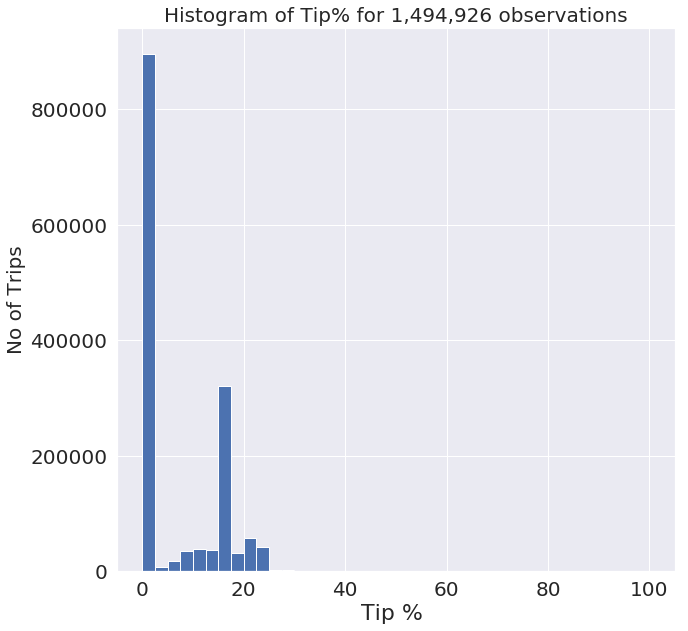

In [24]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
matplotlib.rc('xtick', labelsize=20)     
matplotlib.rc('ytick', labelsize=20)
plt.figure(figsize=(10,10))
plt.hist(df_taxi['Tip_%'],bins=40)
plt.title('Histogram of Tip% for 1,494,926 observations',size=20)
plt.xlabel("Tip % ",size=22)
plt.ylabel("No of Trips",size=20)
plt.grid(True)


#  <font color='darkred'> • Build a predictive model for tip as a percentage of the total fare. Use  as much of the data as you like (or all of it). Provide an estimate of performance  using an appropriate sample, and show your work.


# <font color='blue'> 1. Data Preprocessing:

> ### <font color='limegreen'> Removing Total Amount <=0.  Note that we could have replaced them with something other(Mean, Median or Mode), but in our whole data of 1494926, we were having only handfull(6500) which were outliers and we dont want our model to concentrate more on these kind of outliers, so better we remove them.
    
> ### <font color='limegreen'>Dropping 'Ehail_fee' column which was useless (100% NAN Values)
    
> ### <font color='limegreen'> Removing rows with RateCodeID values 99 which is invalid. There were 4 rows in total and i removed it because it was having many other columns invalid value(eg:  Trip_distance =0, Passenger Count=0, DropOff Longitude and Latitue both 0). There were only 4 such rows, so I removed them.  
    
> ### <font color='limegreen'>  Removing rows with 0 passenger count. We removed it because there were only 267 rows in 1494926 observations.
    
> ### <font color='limegreen'>  Creating a new column with Trip_distance_Zero and Keeping its value 1 if the distance was 0.
>### <font color='limegreen'>  Replacing Trip_Distance having value 0 with mean distance 3.0117792040867934 (which we got by doing mean of Trip_distance values - excluding values with distance 0)
    
> ### <font color='limegreen'>removing Fare_amount ==0 (There were 288 such columns)


In [25]:
print("Removing {} rows with Total Amount <=0 ".format(df_taxi[(df_taxi['Total_amount']<=0)].shape[0]))
df_taxi_tips=df_taxi[(df_taxi['Total_amount']>0)]

df_taxi_tips.drop(columns='Ehail_fee',inplace=True)
print("Ehail_fee column with 100% missing data dropped.")

i=df_taxi_tips[(df_taxi_tips['RateCodeID']==99)].index
df_taxi_tips.drop(index=i,axis=0,inplace=True)
print("Rows with RateCodeID = 99 dropped. There were 4 such rows ")


i=df_taxi_tips[(df_taxi_tips['Passenger_count']==0)].index
df_taxi_tips.drop(index=i,axis=0,inplace=True)
print("Rows with Passenger_count = 0 dropped")

print("Mean is :",df_taxi_tips[df_taxi_tips['Trip_distance']>0]['Trip_distance'].mean())

df_taxi_tips['Trip_distance_Zero']= df_taxi_tips.apply(
    lambda row: 1 if (row['Trip_distance']==0) else 0,
    axis=1
)
print("New column Trip_distance_Zero created.")
df_taxi_tips['Trip_distance'].replace(0,3.0117792040867934,inplace=True)
print("Trip_Distance having values 0, replaced with mean = ",3.0117792040867934)

print("Removing {} rows with Fare Amount <=0 ".format(df_taxi_tips[(df_taxi_tips['Fare_amount']==0)].shape[0]))
df_taxi_tips=df_taxi_tips[(df_taxi['Fare_amount']>0)]


Removing 6589 rows with Total Amount <=0 


/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Ehail_fee column with 100% missing data dropped.
Rows with RateCodeID = 99 dropped. There were 4 such rows 
Rows with Passenger_count = 0 dropped
Mean is : 3.0117792040867934


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


New column Trip_distance_Zero created.
Trip_Distance having values 0, replaced with mean =  3.0117792040867934
Removing 288 rows with Fare Amount <=0 


In [26]:
df_taxi_tips=df_taxi_tips.reset_index(drop=True)

# <font color='blue'> 2. Feature Engineering

> ### <font color='limegreen'> Creating Day of Month Column (1,2,3,...30). The day of the month might act useful if there is some big occasion for US on that day or there is some good news for NYC people on that day or traffic is more on that day due ot some reasons and people would pay tip according to that situation.
    
> ### <font color='limegreen'> Creating Week Column(1,2,3,4,5- Maximum 5th week can start). The Week currently running might also affect the tips because there might be human intuition to give more tip the week they receive salary or Week of Public Holiday when their mood is very good.
    
> ### <font color='limegreen'> Creating Day of Week Column(1,2,3,4,5,6,7) which might be usefull if we want to predict tip because people might be willing to pay high tip on Weekends as they would be in joyfull mood.
    
> ### <font color='limegreen'> Creating Speed from distance in mile and time in seconds. Replacing Nan values with 0.

> ### <font color='blue'>  Most Important: Creating 36 sub-regions in NYC from where a taxi is picking up or where taxi is dropping off. This is very usefull because there might be regions in NYC where people are rich as compared to other regions. Say from this 36 regions, there are 7 very Porshe Regions and people who are picked up from that locations would give more tips as compared to other people from other locations. Thus, Tips can be very highly dependent on this feature set. 
    
> ### <font color='limegreen'>  Treating Pickup Sub-Regions as a Category. One Hot Encoding of this 36 Sub-Regions. We cannot treat SubRegions as a continuous variable because it might not be beneficial while we are using ML algorithms. Intuition behind this: ML Algorithm treats Sub Region as a Continuous quantity ie. If subregion is 1,2,...36, ML algorithm with treat subregion 1 as smaller than subregion 36 because it treats it numerically. Thus we want to treat them as categorical variable so it extracts good features from it. 
    
>### <font color='limegreen'> Treating Week Column and Day of Week column as a Category because they would be more usefull if we treat them as a category because we DO NOT want ML algorithm to infer that 1 as Monday is less than 2 as Tuesday and Sunday-7 is greatest. We want Monday, Tuesday,...Sunday to be treated as categories.
    
> ### <font color='limegreen'> Creating another 36 subregions for DropOff Locations. Initially I tried keeping Pickup and Dropoff as in same group, but model was performing better when I tried it doing different groups. Thus, we now have 36 regions of Pickup and 36 regions of Drop Off. 
    
    
> ### <font color='limegreen'> Treating:  1. VendorID  2. RateCodeID  3. Store_and_fwd_flag  4. Payment_type 5. Hour of Day and  6. Trip_type as Categorical Variables. So I did One Hot Encoding of all these columns. Now, the reason of treating them as categories is same as previous one.
  
> ### <font color='limegreen'> Removing Object Columns (Pickup Date, Date and Time, Date and DropOff Date) which cannot be fitted into ML Model while training.

In [27]:
import datetime
timedf = pd.DataFrame()
timedf['Day']=[ t.day for t in pd.to_datetime(df_taxi_tips['lpep_pickup_datetime'])]
print("Day column created")
timedf['DateandTime']=df_taxi_tips['lpep_pickup_datetime']
timedf['Date']=[ t.date() for t in pd.to_datetime(df_taxi_tips['lpep_pickup_datetime'])]
print("Date Column Created")
baseweek=datetime.datetime(2015,9,1).isocalendar()[1]

timedf['Week']=timedf['Date'].apply(lambda x : x.isocalendar()[1])-baseweek+1
print("Week of Month Column Created")
timedf['DayofWeek']=timedf['Date'].apply(lambda x : x.isocalendar()[2])
print("Day of Week Column Created")

timedf['Speed']=df_taxi_tips.Trip_distance/(df_taxi_tips.Trip_time/3600)
print('Initially there are {} null values in Speed column'.format(timedf.Speed.isna().sum()))
timedf['Speed'].fillna(0,inplace=True)
print('Now there are {} null values in Speed column'.format(timedf.Speed.isna().sum()))
d={}
d[40.56]={-73.98:1}     
d[40.62]={-73.98:2} 
d[40.65]={-74.01:3,-73.98:4,-73.95:5,-73.92:6}       
d[40.68]={-74.01:7,-73.98:8,-73.95:9,-73.92:10 ,-73.83:11} 
d[40.71]={-73.98:12,-73.95:13,-73.89:14,-73.86:15,-73.83:16}  
d[40.74]={-73.98:17,-73.95:18,-73.92 :19,-73.89:20,-73.86:21,-73.83:22 }     
d[40.77]={-73.98:23,-73.95:24,-73.92:25}
d[40.80]={-73.98:26,-73.95:27,-73.92:28}
d[40.83]={-73.95:29,-73.92:30,-73.89:31,-73.86:32}     
d[40.86]={-73.95:33,-73.92:34,-73.89:35} 


timedf["Pickup_latitude"] = df_taxi_tips.Pickup_latitude
timedf["Pickup_longitude"] = df_taxi_tips.Pickup_longitude
step = 0.03
to_bin = lambda x: np.floor( x/ step) * step
timedf["latbin"] = df_taxi_tips.Pickup_latitude.map(to_bin)
timedf["lonbin"] = df_taxi_tips.Pickup_longitude.map(to_bin)

timedf.head()

arr=np.array(timedf)
group=[]
for x in range(0,len(timedf)):
    if(arr[:,8][x] in d.keys()):
        if(arr[:,9][x] in d[arr[:,8][x]].keys()):
            g=d[arr[:,8][x]][arr[:,9][x]]
            group.append(g)
        else:
            group.append(0)
    else:
        group.append(0)
timedf['Group1']=group
timedf.Group1.value_counts()

timedf["Dropoff_latitude"] = df_taxi_tips.Dropoff_latitude
timedf["Dropoff_longitude"] = df_taxi_tips.Dropoff_longitude
step = 0.03
to_bin = lambda x: np.floor( x/ step) * step
timedf["latbin2"] = df_taxi_tips.Dropoff_latitude.map(to_bin)
timedf["lonbin2"] = df_taxi_tips.Dropoff_longitude.map(to_bin)
groups = timedf.groupby(("latbin2", "lonbin2"))
timedf.head()

arr=np.array(timedf)
group=[]
for x in range(0,len(timedf)):
    if(arr[:,13][x] in d.keys()):
        if(arr[:,14][x] in d[arr[:,13][x]].keys()):
            g=d[arr[:,13][x]][arr[:,14][x]]
            group.append(g)
        else:
            group.append(0)
    else:
        group.append(0)
timedf['Group2']=group
timedf.Group2.value_counts()
timedf=timedf.reset_index(drop=True)
df_taxi_tips=pd.concat([df_taxi_tips,timedf],axis=1)

Day column created
Date Column Created
Week of Month Column Created
Day of Week Column Created
Initially there are 0 null values in Speed column
Now there are 0 null values in Speed column


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:61: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.


In [28]:
# df_taxi_tips.head()

In [29]:
df_taxi_tips['Group1'].isna().sum()

0

In [30]:
df_taxi_tips.shape
taxi_backup=df_taxi_tips[['Group1','Group2','Week','DayofWeek','Airport','VendorID','RateCodeID','Store_and_fwd_flag','Trip_type ','Payment_type','lpep_pickup_datetime', 'Lpep_dropoff_datetime','Date', 'DateandTime']].copy()

In [31]:
pd.get_dummies(df_taxi_tips['Group2'])
df_taxi_tips = pd.concat([df_taxi_tips,pd.get_dummies(df_taxi_tips['Group2'], prefix='Group2',dummy_na=True)],axis=1).drop(['Group2'],axis=1)
print("One Hot Encoding of Group2 done and shape is :",df_taxi_tips.shape[1])
df_taxi_tips = pd.concat([df_taxi_tips,pd.get_dummies(df_taxi_tips['Group1'], prefix='Group1',dummy_na=True)],axis=1).drop(['Group1'],axis=1)
print("One Hot Encoding of Group1 done and shape is :",df_taxi_tips.shape[1])
df_taxi_tips = pd.concat([df_taxi_tips,pd.get_dummies(df_taxi_tips['DayofWeek'], prefix='DayofWeek',dummy_na=True)],axis=1).drop(['DayofWeek'],axis=1)
df_taxi_tips = pd.concat([df_taxi_tips,pd.get_dummies(df_taxi_tips['Airport'], prefix='Airport',dummy_na=True)],axis=1).drop(['Airport'],axis=1)
df_taxi_tips = pd.concat([df_taxi_tips,pd.get_dummies(df_taxi_tips['hour'], prefix='hour',dummy_na=True)],axis=1)
df_taxi_tips = pd.concat([df_taxi_tips,pd.get_dummies(df_taxi_tips['Week'], prefix='Week',dummy_na=True)],axis=1).drop(['Week'],axis=1)
df_taxi_tips = pd.concat([df_taxi_tips,pd.get_dummies(df_taxi_tips['VendorID'], prefix='VendorID',dummy_na=True)],axis=1).drop(['VendorID'],axis=1)
df_taxi_tips = pd.concat([df_taxi_tips,pd.get_dummies(df_taxi_tips['RateCodeID'], prefix='RateCodeID',dummy_na=True)],axis=1).drop(['RateCodeID'],axis=1)
df_taxi_tips = pd.concat([df_taxi_tips,pd.get_dummies(df_taxi_tips['Store_and_fwd_flag'], prefix='Store_and_fwd_flag',dummy_na=True)],axis=1).drop(['Store_and_fwd_flag'],axis=1)
df_taxi_tips = pd.concat([df_taxi_tips,pd.get_dummies(df_taxi_tips['Trip_type '], prefix='Trip_type',dummy_na=True)],axis=1).drop(['Trip_type '],axis=1)
df_taxi_tips = pd.concat([df_taxi_tips,pd.get_dummies(df_taxi_tips['Payment_type'], prefix='Payment_type',dummy_na=True)],axis=1).drop(['Payment_type'],axis=1)
df_taxi_tips.dtypes[df_taxi_tips.dtypes=='object']
df_taxi_tips.drop(['lpep_pickup_datetime', 'Lpep_dropoff_datetime','Date', 'DateandTime'], inplace=True, axis=1)
df_taxi_tips.Speed[(df_taxi_tips.Speed<240)&(df_taxi_tips.Speed>0)].mean()
indices = df_taxi_tips[(df_taxi_tips.Speed>240)].index
df_taxi_tips.loc[indices,'Speed']=13.32423148992669

One Hot Encoding of Group2 done and shape is : 70
One Hot Encoding of Group1 done and shape is : 100


In [32]:
taxi_backup=pd.concat([df_taxi_tips,taxi_backup],axis=1)
# taxi_backup is used later
# df_taxi_tips.head()


In [33]:
# taxi_backup.head()

## Loading Libraries to use later

In [34]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import datetime
import time
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (roc_curve, auc, accuracy_score)
 

# <font color='blue'> Model Building


In [34]:
df_taxi_tips.corr()['Tip_%']

Pickup_longitude         -0.002563
Pickup_latitude          -0.004883
Dropoff_longitude        -0.018082
Dropoff_latitude          0.009585
Passenger_count           0.001373
Trip_distance             0.095788
Fare_amount               0.085370
Extra                     0.012975
MTA_tax                   0.066664
Tolls_amount              0.043230
improvement_surcharge     0.065931
Total_amount              0.230755
Trip_time                -0.011282
hour                      0.011478
Tip_%                     1.000000
Trip_distance_Zero       -0.006107
Day                       0.023592
Speed                     0.040409
Pickup_latitude          -0.004883
Pickup_longitude         -0.002563
latbin                   -0.004760
lonbin                   -0.002704
Dropoff_latitude          0.009585
Dropoff_longitude        -0.018082
latbin2                   0.009664
lonbin2                  -0.018158
Group2_0.0                0.110138
Group2_2.0                0.006359
Group2_4.0          

In [35]:

#Creating Train Test split from here. X_test and y_test is TEST SET and they will not be touched upon from now until testing phase.
X_train, X_test, y_train, y_test = train_test_split(np.array(df_taxi_tips.drop('Tip_%',axis=1)),np.array(df_taxi_tips['Tip_%']), test_size=0.05, random_state=42)

# X_train and y_train will be further splitted into X_train_new and X_valid and same for y variable.
X_train_new, X_validation, y_train_new, y_validation = train_test_split(X_train,y_train, test_size=0.20, random_state=42)

print('Training Features Shape:', X_train.shape)
print('Training Label Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Label Shape:', y_test.shape)


Training Features Shape: (1413392, 153)
Training Label Shape: (1413392,)
Testing Features Shape: (74390, 153)
Testing Label Shape: (74390,)


In [36]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(max_depth=10, n_estimators=100,random_state=42, verbose=True)
forest.fit( X_train_new, y_train_new)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 33.7min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=42, verbose=True,
           warm_start=False)

In [37]:
from sklearn.metrics import mean_squared_error
ypred2=forest.predict(X_test)
error2 = mean_squared_error(ypred2, y_test)
print("Our MSE(Mean Squared Error ) is : ",error2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Our MSE(Mean Squared Error ) is :  15.045183080201236


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


In [38]:

#Creating Train Test split from here. X_test and y_test is TEST SET and they will not be touched upon from now until testing phase.
X_train, X_test, y_train, y_test = train_test_split(np.array(df_taxi_tips.drop('Tip_%',axis=1)),np.array(df_taxi_tips['Tip_%']), test_size=0.05, random_state=42)

# X_train and y_train will be further splitted into X_train_new and X_valid and same for y variable.
X_train_new, X_validation, y_train_new, y_validation = train_test_split(X_train,y_train, test_size=0.20, random_state=42)

# Creating Evaluation Set using X_validation and y_validation which we created in above step.
validation_set = [ ( X_validation, y_validation ) ]

#This parameters are found by Hyperparameter tuning and still further better could be done if time were not the constraint.
param = { "silent":False, "max_depth":10, "n_estimators":500}

# Setting up the XGBRegressor model and parameters as mentioned above are passed. 
xgbmodel = xgb.XGBRegressor( **param )

# We will set evaluation set/ validation set to eval_set parameter 
# early stopping =50 is highly prefered in order to prevent overfitting.
# Also we have used rmse as our metric which is Root mean squared error. 
xgbmodel.fit( X_train_new, y_train_new, eval_metric="rmse",early_stopping_rounds=50, eval_set=validation_set, verbose=True )


[01:22:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 416 extra nodes, 0 pruned nodes, max_depth=10
[0]	validation_0-rmse:9.8306
Will train until validation_0-rmse hasn't improved in 50 rounds.
[01:22:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 460 extra nodes, 0 pruned nodes, max_depth=10
[1]	validation_0-rmse:9.00018
[01:22:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 516 extra nodes, 0 pruned nodes, max_depth=10
[2]	validation_0-rmse:8.26379
[01:23:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 522 extra nodes, 0 pruned nodes, max_depth=10
[3]	validation_0-rmse:7.59733
[01:23:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 516 extra nodes, 0 pruned nodes, max_depth=10
[4]	validation_0-rmse:7.01111
[01:23:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 526 extra nodes, 0 pruned nodes, max_depth=10
[5]	validation_0-rmse:6.49591
[01:23

[52]	validation_0-rmse:0.957651
[01:34:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1130 extra nodes, 0 pruned nodes, max_depth=10
[53]	validation_0-rmse:0.922869
[01:35:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1200 extra nodes, 0 pruned nodes, max_depth=10
[54]	validation_0-rmse:0.906947
[01:35:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1324 extra nodes, 0 pruned nodes, max_depth=10
[55]	validation_0-rmse:0.877768
[01:35:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1260 extra nodes, 0 pruned nodes, max_depth=10
[56]	validation_0-rmse:0.856781
[01:35:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1216 extra nodes, 0 pruned nodes, max_depth=10
[57]	validation_0-rmse:0.839836
[01:36:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1286 extra nodes, 0 pruned nodes, max_depth=10
[58]	validation_0-rmse:0.822235
[01:36:15] /workspac

[104]	validation_0-rmse:0.388564
[01:46:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1640 extra nodes, 0 pruned nodes, max_depth=10
[105]	validation_0-rmse:0.385475
[01:46:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1260 extra nodes, 0 pruned nodes, max_depth=10
[106]	validation_0-rmse:0.382998
[01:46:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1150 extra nodes, 0 pruned nodes, max_depth=10
[107]	validation_0-rmse:0.380849
[01:46:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1628 extra nodes, 0 pruned nodes, max_depth=10
[108]	validation_0-rmse:0.376687
[01:46:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1474 extra nodes, 0 pruned nodes, max_depth=10
[109]	validation_0-rmse:0.374476
[01:47:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1398 extra nodes, 0 pruned nodes, max_depth=10
[110]	validation_0-rmse:0.372916
[01:47:24] /w

[156]	validation_0-rmse:0.295063
[01:57:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1320 extra nodes, 0 pruned nodes, max_depth=10
[157]	validation_0-rmse:0.294347
[01:57:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1364 extra nodes, 0 pruned nodes, max_depth=10
[158]	validation_0-rmse:0.293216
[01:57:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1244 extra nodes, 0 pruned nodes, max_depth=10
[159]	validation_0-rmse:0.292666
[01:57:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1650 extra nodes, 0 pruned nodes, max_depth=10
[160]	validation_0-rmse:0.29174
[01:58:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1702 extra nodes, 0 pruned nodes, max_depth=10
[161]	validation_0-rmse:0.290901
[01:58:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1326 extra nodes, 0 pruned nodes, max_depth=10
[162]	validation_0-rmse:0.289588
[01:58:35] /wo

[208]	validation_0-rmse:0.265267
[02:08:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1456 extra nodes, 0 pruned nodes, max_depth=10
[209]	validation_0-rmse:0.264992
[02:08:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1112 extra nodes, 0 pruned nodes, max_depth=10
[210]	validation_0-rmse:0.264818
[02:08:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1020 extra nodes, 0 pruned nodes, max_depth=10
[211]	validation_0-rmse:0.264637
[02:09:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1288 extra nodes, 0 pruned nodes, max_depth=10
[212]	validation_0-rmse:0.264134
[02:09:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1486 extra nodes, 0 pruned nodes, max_depth=10
[213]	validation_0-rmse:0.263464
[02:09:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1346 extra nodes, 0 pruned nodes, max_depth=10
[214]	validation_0-rmse:0.263146
[02:09:50] /w

[260]	validation_0-rmse:0.251378
[02:19:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1316 extra nodes, 0 pruned nodes, max_depth=10
[261]	validation_0-rmse:0.251049
[02:19:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1382 extra nodes, 0 pruned nodes, max_depth=10
[262]	validation_0-rmse:0.250509
[02:20:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1424 extra nodes, 0 pruned nodes, max_depth=10
[263]	validation_0-rmse:0.250361
[02:20:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1020 extra nodes, 0 pruned nodes, max_depth=10
[264]	validation_0-rmse:0.250151
[02:20:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1420 extra nodes, 0 pruned nodes, max_depth=10
[265]	validation_0-rmse:0.249781
[02:20:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1618 extra nodes, 0 pruned nodes, max_depth=10
[266]	validation_0-rmse:0.2495
[02:21:00] /wor

[312]	validation_0-rmse:0.242378
[02:30:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 954 extra nodes, 0 pruned nodes, max_depth=10
[313]	validation_0-rmse:0.242294
[02:31:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1116 extra nodes, 0 pruned nodes, max_depth=10
[314]	validation_0-rmse:0.242093
[02:31:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1328 extra nodes, 0 pruned nodes, max_depth=10
[315]	validation_0-rmse:0.24189
[02:31:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1100 extra nodes, 0 pruned nodes, max_depth=10
[316]	validation_0-rmse:0.241728
[02:31:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 282 extra nodes, 0 pruned nodes, max_depth=10
[317]	validation_0-rmse:0.241705
[02:31:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 912 extra nodes, 0 pruned nodes, max_depth=10
[318]	validation_0-rmse:0.241682
[02:32:09] /works

[364]	validation_0-rmse:0.236185
[02:42:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1264 extra nodes, 0 pruned nodes, max_depth=10
[365]	validation_0-rmse:0.236039
[02:42:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 794 extra nodes, 0 pruned nodes, max_depth=10
[366]	validation_0-rmse:0.236016
[02:42:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1234 extra nodes, 0 pruned nodes, max_depth=10
[367]	validation_0-rmse:0.235952
[02:42:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 934 extra nodes, 0 pruned nodes, max_depth=10
[368]	validation_0-rmse:0.23592
[02:42:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1250 extra nodes, 0 pruned nodes, max_depth=10
[369]	validation_0-rmse:0.235728
[02:43:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1282 extra nodes, 0 pruned nodes, max_depth=10
[370]	validation_0-rmse:0.235622
[02:43:18] /work

[416]	validation_0-rmse:0.232091
[02:53:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 910 extra nodes, 0 pruned nodes, max_depth=10
[417]	validation_0-rmse:0.231996
[02:53:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1232 extra nodes, 0 pruned nodes, max_depth=10
[418]	validation_0-rmse:0.231963
[02:53:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 820 extra nodes, 0 pruned nodes, max_depth=10
[419]	validation_0-rmse:0.231894
[02:53:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 806 extra nodes, 0 pruned nodes, max_depth=10
[420]	validation_0-rmse:0.231887
[02:54:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1110 extra nodes, 0 pruned nodes, max_depth=10
[421]	validation_0-rmse:0.23181
[02:54:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1138 extra nodes, 0 pruned nodes, max_depth=10
[422]	validation_0-rmse:0.23171
[02:54:26] /worksp

[468]	validation_0-rmse:0.229815
[03:04:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1408 extra nodes, 0 pruned nodes, max_depth=10
[469]	validation_0-rmse:0.229756
[03:04:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1598 extra nodes, 0 pruned nodes, max_depth=10
[470]	validation_0-rmse:0.229637
[03:04:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1476 extra nodes, 0 pruned nodes, max_depth=10
[471]	validation_0-rmse:0.229545
[03:04:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1380 extra nodes, 0 pruned nodes, max_depth=10
[472]	validation_0-rmse:0.229478
[03:05:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1152 extra nodes, 0 pruned nodes, max_depth=10
[473]	validation_0-rmse:0.229447
[03:05:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1180 extra nodes, 0 pruned nodes, max_depth=10
[474]	validation_0-rmse:0.229389
[03:05:33] /w

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=False, subsample=1)

In [39]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
ypred=xgbmodel.predict(X_test)
error = mean_absolute_error(ypred, y_test)
print("Our XGBOOST MAE(Mean Absolute Error ) is : ",error)

Our XGBOOST MAE(Mean Absolute Error ) is :  0.050911784915922034


In [40]:
from sklearn.metrics import mean_squared_error
ypred=xgbmodel.predict(X_test)
error = mean_squared_error(ypred, y_test)
print("Our XGBOOST MSE(Mean Squared Error ) is : ",error)

Our XGBOOST MSE(Mean Squared Error ) is :  0.053042014532034186


In [41]:
resultdf=pd.DataFrame()
resultdf['y_test']=y_test
resultdf['ypred']=ypred
resultdf['y_test-ypred']=y_test-ypred
resultdf

,y_test,ypred,y_test-ypred
0,0.000000,-0.001933,0.001933
1,0.000000,-0.000533,0.000533
2,0.000000,0.000164,-0.000164
3,0.000000,-0.001161,0.001161
4,16.666667,16.660606,0.006060
5,19.745223,19.757586,-0.012363
6,14.705882,14.674166,0.031717
7,0.000000,-0.001365,0.001365
8,0.000000,0.000686,-0.000686
9,32.258065,32.116093,0.141972


In [42]:
import math

print("RMSE :",math.sqrt((resultdf['y_test-ypred']**2).mean()))

RMSE : 0.230308520320114


## Printing feature_importances

In [43]:
print(len(xgbmodel.feature_importances_))

153


In [44]:
xgbmodel.feature_importances_

array([1.2228319e-01, 7.6405019e-02, 5.3895041e-02, 7.4943647e-02,
       5.4284511e-03, 3.6148317e-02, 1.6809243e-01, 3.7547648e-02,
       5.7731150e-03, 2.2361772e-02, 4.9217958e-03, 2.0096299e-01,
       4.1604340e-02, 1.7891485e-02, 5.0320884e-04, 1.7057400e-02,
       1.9949127e-02, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 1.2959350e-03, 1.8267169e-04, 3.9980974e-04,
       3.6879003e-04, 2.0679814e-04, 5.9971464e-04, 5.8937469e-04,
       2.5505104e-04, 1.8267169e-04, 4.1014966e-04, 2.2403132e-04,
       2.3781786e-04, 3.3777030e-04, 1.9301160e-04, 6.1005453e-04,
       3.7568330e-04, 5.3078192e-04, 3.2398375e-04, 3.6534338e-04,
       2.7573085e-05, 1.9094362e-03, 2.3712853e-03, 1.4751601e-03,
       2.3574987e-03, 7.4102666e-04, 4.0670301e-04, 2.8951740e-04,
       3.8257657e-04, 4.4461602e-04, 2.3437123e-04, 0.0000000e+00,
       1.0374374e-03, 1.5854524e-04, 4.6184918e-04, 3.1709048e

In [46]:
d={}
for i in range(0,153):
    d[df_taxi_tips.columns[i]]=xgbmodel.feature_importances_[i]
    print(d[df_taxi_tips.columns[i]])


In [47]:
d=sorted(d.items(),key= lambda value: value[1],reverse=True)
d

[('Total_amount', 0.20096299),
 ('Fare_amount', 0.16809243),
 ('Trip_time', 0.04160434),
 ('Extra', 0.037547648),
 ('Trip_distance', 0.036148317),
 ('Tolls_amount', 0.022361772),
 ('Day', 0.019949127),
 ('hour', 0.017891485),
 ('Trip_type_nan', 0.017881146),
 ('Trip_distance_Zero', 0.0170574),
 ('MTA_tax', 0.005773115),
 ('Week_nan', 0.0057352018),
 ('Passenger_count', 0.005428451),
 ('improvement_surcharge', 0.004921796),
 ('Group2_26.0', 0.0023712853),
 ('Group2_28.0', 0.0023574987),
 ('Group2_22.0', 0.0019094362),
 ('DayofWeek_4.0', 0.0018473967),
 ('Week_2.0', 0.0018025904),
 ('Group1_26.0', 0.0017750174),
 ('DayofWeek_2.0', 0.0017715708),
 ('DayofWeek_5.0', 0.0017715708),
 ('VendorID_nan', 0.0017715708),
 ('DayofWeek_1.0', 0.0016371519),
 ('DayofWeek_3.0', 0.0016061323),
 ('Week_1.0', 0.0015199664),
 ('Group2_27.0', 0.0014751601),
 ('DayofWeek_6.0', 0.0014544802),
 ('Group1_nan', 0.0013579745),
 ('lonbin2', 0.001295935),
 ('Week_3.0', 0.0012338955),
 ('RateCodeID_4.0', 0.001189089

## Code for Parameter Tuning which could be used to tune Hyper Parameters.


In [48]:
# import xgboost as xgb 
# xgb_model =  xgb.XGBRegressor()
# parameters = {'objective':['reg:linear'],
#               'learning_rate': [0.01,0.05,0.1,0.2,0.3,0.5],
#               'max_depth': [6,8,10,12],
#               'min_child_weight': [8,10,12],
#               'silent': [1],
#               'subsample': [0.8],
#               'colsample_bytree': [0.7],
#               'n_estimators': [5,50,100,500,1000],
#               'seed': [42]}


# clf = GridSearchCV(xgb_model, parameters,cv=5,scoring='neg_mean_squared_error',verbose=2,refit=True)

# clf.fit(X_train, y_train)

# clf.grid_scores_


# <font color='darkred'>Question 5 : Choose only one of these options to answer for Question 5. There is no preference as to which one you choose. Please select the question that you feel your particular skills and/or expertise are best suited to. If you answer more than one, only the first will be scored.

## <font color='darkred'>• Option A: Distributions

### <font color='darkred'>• Build a derived variable representing the average speed over the course of a trip.

### <font color='darkred'>• Can you perform a test to determine if the average trip speeds are materially the same in all weeks of September? If you decide they are not the same, can you form a hypothesis regarding why they differ?

### <font color='darkred'>• Can you build up a hypothesis of average trip speed as a function of time of day?



## <font color='darkred'>5.A.1 • Build a derived variable representing the average speed over the course of a trip.

## <font color='blue'>Answer 5.A.1 
## <font color='blue'>• I have already build a column 'Speed' that was derived in Feature Engineering Section. It was derived from distance and time varaible. We had distance in Miles and time in Seconds. So Speed was derived by 

## <font color='blue'>$$Speed={\frac  {Distance(in Miles)}{Duration(in seconds)*(3600)}}$$ 
## <font color='blue'> Thus, our derived varaible $$Speed={\frac{Distance(in Miles)}{Duration(in Hour)}}$$

### <font color='blue'> Now, I took mean of all Speed Values which were >0 and <240 and that mean turned out to be 13.324 and I replaced    1. Nan,  2. float('inf')  3. NULL  and 4. Speed >240 values with our mean value 13.324 which would be our best estimate as we have very much large amount of data and Mean imputation turns out to be best in such cases. 

In [35]:
df_taxi_tips['Speed'].head()

0    13.324231
1    13.324231
2    13.792208
3    10.829268
4     8.926829
Name: Speed, dtype: float64

## <font color='darkred'>Question 5.A.2 
## <font color='darkred'>    • Can you perform a test to determine if the average trip speeds are materially the same in all weeks of September? If you decide they are not the same, can you form a hypothesis regarding why they differ?


### Lets have a look at average speed of taxi in all weeks.


In [36]:
taxi_backup.groupby('Week').mean()['Speed']

Week
1    13.806461
2    13.073065
3    13.099998
4    13.571924
5    12.923634
Name: Speed, dtype: float64

In [37]:
taxi_backup.groupby('DayofWeek').mean()['Speed'].values

array([13.93498571, 13.11474977, 12.91042952, 12.68070843, 12.75760886,
       13.57337905, 14.33794771])

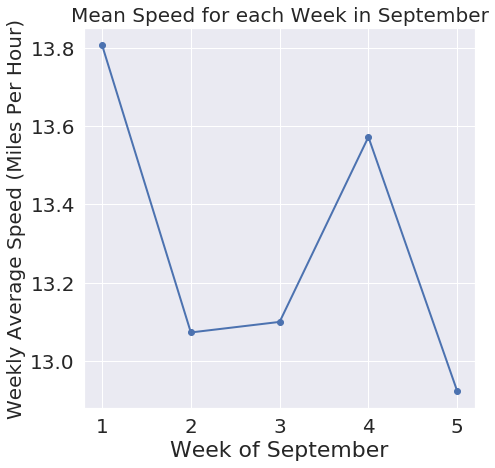

In [38]:
plt.figure(figsize=(7,7))
plt.plot([1,2,3,4,5],taxi_backup.groupby('Week').mean()['Speed'].values,'bo-',linewidth=2)
plt.title('Mean Speed for each Week in September',size=20)
plt.xlabel("Week of September",size=22)
plt.ylabel("Weekly Average Speed (Miles Per Hour)",size=20)
plt.grid(True)

### We can see from above graph that the 2nd and 3rd week has low Mean Speed as compared to 1st and 4th. Moreover, 5th week is having lowest.

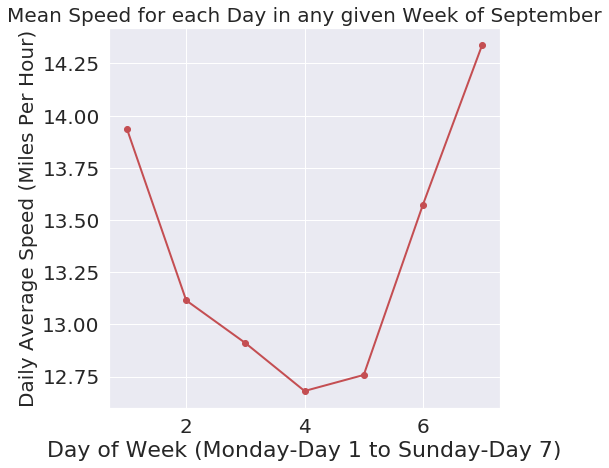

In [39]:
plt.figure(figsize=(7,7))
plt.plot([1,2,3,4,5,6,7],taxi_backup.groupby('DayofWeek').mean()['Speed'].values,'ro-',linewidth=2)
plt.title('Mean Speed for each Day in any given Week of September',size=20)
plt.xlabel("Day of Week (Monday-Day 1 to Sunday-Day 7)",size=22)
plt.ylabel("Daily Average Speed (Miles Per Hour)",size=20)
plt.grid(True)

### We can see that there is very high speed on Monday , while there are low speeds on 3rd, 4th and 5th day . Then again from Saturday the speed increases and we have on Sunday a speed of 14.337.

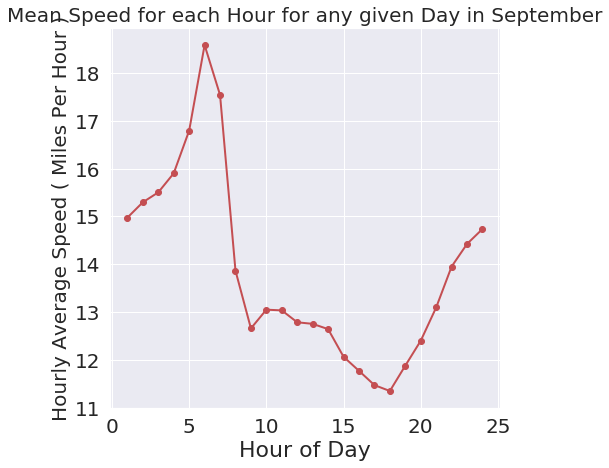

In [40]:
plt.figure(figsize=(7,7))
plt.plot(range(1,25),taxi_backup.groupby('hour').mean()['Speed'].values,'ro-',linewidth=2)
plt.title('Mean Speed for each Hour for any given Day in September',size=20)
plt.xlabel("Hour of Day",size=22)
plt.ylabel("Hourly Average Speed ( Miles Per Hour )",size=20)
plt.grid(True)

### We can observe from figure that we have a very steep high speed in morning 4 to 6 AM, while a noteworthy change is seen in evening 3 to 6 PM, when there is so much less average speed as compared ot whole day. 

## <font color='darkred'>Can you perform a test to determine if the average trip speeds are materially the same in all weeks of September?

# <font color='blue'> Test: One Way Anova test.

### <font color='blue'>Why One Way? 
> ### <font color='blue'>A one-way ANOVA is used when we have 1 categorical Independent Variable with 3+ categories or groups, and 1 continuous dependent variable. This is Design of One Way Anova Test.

### <font color='blue'>In our case: We can see that there is One continuous Dependent Variable: Speed (Speed is Dependent on Week and Speed is Continuous) AND We have one categorical independent variable which is Week and it has 3+ Categories(Week 1 to Week 5). Thus I have used Anova Test here. 


### <font color='blue'>In a given month of September, 2015:
> ### <font color='blue'>Null Hypothesis: "Average Speed is almost same through all Weeks from 1 to 5."

> ### <font color='blue'>Alternate Hypothesis: "Average Speed differs among in at least two weeks with a significant amount."

> ### <font color='blue'>P value turned out to be 0.0 which means we do not have enough enough claims to support Null Hypothesis or in other terms, the probability of given event occuring is almost 0, if we assume that Null Hypothesis is true. Thus, if we assume that Average Speed is equal for all weeks, we have 0 probability for the data that we have. Thus, we will reject NULL Hypothesis. 

> ### <font color='blue'>Rejecting Null Hypothesis means we CANNOT consider that we have almost same Average speeds.


### <font color='blue'> Anova Results: P value=0.0 and test statistic=485.9197592 and thus we REJECT NULL Hypothesis of means being equal.

### <font color='limegreen '>How I achieved results?
>### <font color='limegreen '>1. Got Week 1 Speed data into variable w1, same way for w2, w3, w4 and w5.
>### <font color='limegreen '>2. After getting Speed data into seperate groups, passing them to f_oneway() method of stats imprted from scipy.
>### <font color='limegreen '>3. We will get results performing above step.

In [41]:
from scipy import stats 
w1=taxi_backup[(taxi_backup['Week']==1)]['Speed']
w2=taxi_backup[(taxi_backup['Week']==2)]['Speed']
w3=taxi_backup[(taxi_backup['Week']==3)]['Speed']
w4=taxi_backup[(taxi_backup['Week']==4)]['Speed']
w5=taxi_backup[(taxi_backup['Week']==5)]['Speed']
# print("Total of all :",w1.shape[0]+w2.shape[0]+w3.shape[0]+w4.shape[0]+w5.shape[0])
# print(taxi_backup.shape[0])
stats.f_oneway(w1,w2,w3,w4,w5)

F_onewayResult(statistic=485.9197592749325, pvalue=0.0)

## <font color=darkred> If you decide they are not the same, can you form a hypothesis regarding why they differ?

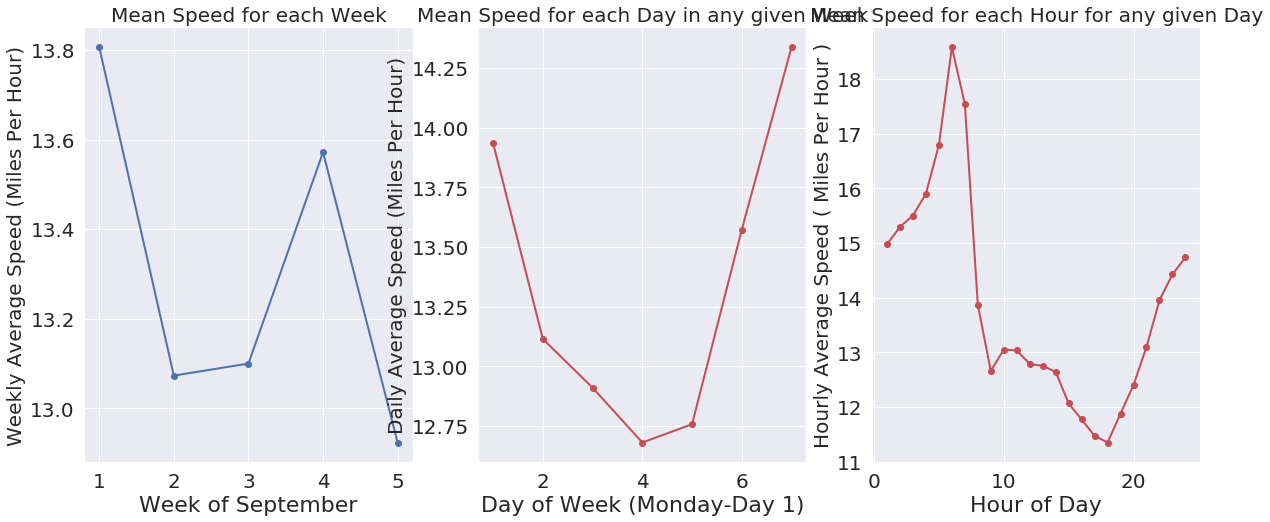

In [42]:
sns.set()
matplotlib.rc('xtick', labelsize=20)     
matplotlib.rc('ytick', labelsize=20)
plt.figure(1,figsize=(20,8))

plt.subplot(131)
plt.plot([1,2,3,4,5],taxi_backup.groupby('Week').mean()['Speed'].values,'bo-',linewidth=2)
plt.title('Mean Speed for each Week',size=20)
plt.xlabel("Week of September",size=22)
plt.ylabel("Weekly Average Speed (Miles Per Hour)",size=20)
plt.grid(True)

plt.subplot(132)
plt.plot([1,2,3,4,5,6,7],taxi_backup.groupby('DayofWeek').mean()['Speed'].values,'ro-',linewidth=2)
plt.title('Mean Speed for each Day in any given Week',size=20)
plt.xlabel("Day of Week (Monday-Day 1)",size=22)
plt.ylabel("Daily Average Speed (Miles Per Hour)",size=20)
plt.grid(True)

plt.subplot(133)
plt.plot(range(1,25),taxi_backup.groupby('hour').mean()['Speed'].values,'ro-',linewidth=2)
plt.title('Mean Speed for each Hour for any given Day',size=20)
plt.xlabel("Hour of Day",size=22)
plt.ylabel("Hourly Average Speed ( Miles Per Hour )",size=20)
plt.grid(True)

## <font color='blue'> Hypothesis regarding why the average speed differs: 
>## <font color='blue'> We can see from first graph that week 5 is having too much low Average Speeds as compared to the other weeks. Now, from Second graph we can easily see that 6th and 7th day(Saturday and Sunday) are having high average speeds than most of the other days. Now a close inspection discovered that, In week 5 We have No Saturday and No Sunday. Thus the two days on which people tend to drive faster, are not there in week 5. Thus we have only low averages day in Week 5, which leads us to MAJOR difference in their means. 
    
>>#### <font color='blue'>Week 1: Tuesday to Sunday
>>#### <font color='blue'>Week 2: All
>>#### <font color='blue'>Week 3: All
>>#### <font color='blue'>Week 4 : All
>>#### <font color='blue'>Week 5: Monday, Tuesday and Wednesday (Less Average Speed Days)

# <font color='darkred'> Can you build up a hypothesis of average trip speed as a function of time of day?

In [ ]:
sns.set()
matplotlib.rc('xtick', labelsize=20)     
matplotlib.rc('ytick', labelsize=20)
plt.figure(1,figsize=(20,15))

plt.subplot(221)
plt.plot(range(1,25),taxi_backup.groupby('hour').mean()['Speed'].values,'bo-',linewidth=2)
plt.title('Mean Speed for each Hour for any given Day',size=20)
plt.xlabel("Hour of Day",size=22)
plt.ylabel("Hourly Average Speed ( Miles Per Hour )",size=20)
plt.grid(True)

plt.subplot(222)
plt.plot(range(1,25),taxi_backup.groupby('hour').count()['Speed'].values,'ro-',linewidth=2)
plt.title('Count of Trips for each Hour for any given Day',size=20)
plt.xlabel("Hour of Day",size=22)
plt.ylabel("Count of Trips",size=20)
plt.grid(True)

plt.subplot(223)
plt.plot(df_hour['Hour'],df_hour['Mean_distance'],'bo-',linewidth=2,label='Mean Distance')
plt.legend(loc='upper right',fontsize=20)
plt.title('Graph representing Mean Distance corresponding Hour of Day',size=20)
plt.xlabel("Hour of the Day",size=22)
plt.ylabel("Distance (in Miles)",size=20)
plt.grid(True)

plt.subplot(224)
plt.plot(range(1,25),taxi_backup.groupby('hour').mean()['Trip_time'].values,'ro-',linewidth=2)
plt.title('Graph representing Trip Duration for given Hour',size=20)
plt.xlabel("Hour of the Day",size=22)
plt.ylabel("Trip Duration in Seconds",size=20)
plt.grid(True)

### <font color='blue'> From 12 Am to 5PM, the graphs of Speed and Count of Trips(First 2) are perfectly mirror images of one another. This leads to some clear explanations that as count increases ie as number of trips increases, the average speed of taxi on roads decreases. 

### <font color='blue'> Hypothesis for Average Speed as a function of time of day:
### <font color='blue'>12 AM to 7AM
### <font color='blue'>Why 12AM to 7 AM high Average Speed?
> ### <font color='blue'>    1A. There are high average speeds from 12 AM late night to morning 7AM. If we look closely, there are too much high average speeds from 5 to 7 which is logical. This is because, at night or early morning before 6, there might not be much traffic and taxi drivers tend to drive faster if the roads are empty. 
> ### <font color='blue'>    1B. Another reason is from 2nd graph, we can see that number of rides are less from 12 AM to 7AM exactly, and then it increases. Thus, when rides are less, the traffic would be less and thus the speeds would be more. 

### <font color='blue'>7AM to 9 AM    
### <font color='blue'>Why from after 7 AM it drastically started to decrease untill 9AM?    
> ### <font color='blue'>    2A . We all know that the first shift of people going to work is 8AM ot 4PM or 9AM to 5PM. Thus, We can infer that more people will be going to work after 7AM untill 9AM because their work duty starts from 8 or 9, which makes a clear logical sense.
> ### <font color='blue'>    2B. As we can see from 2nd graph that from 7AM to 9AM, there is a lot increase in number of count of trips, thus if number of taxi on roads increases, traffic increases and this leads to decrease in average speed.
    
### <font color='blue'>10 AM to 3PM 
> ### <font color='blue'>    3A . No Special changes in Graph 1.
> ### <font color='blue'>    3B . No Special Changes in Graph 2.

### <font color='blue'>3PM to 6PM
### <font color='blue'>Why was there unwanted decrease from 3PM to 6PM ?  
> ### <font color='blue'>    4. Now, Taxi Drivers mostly changes shifts from around 4 to 5PM and that is the reason that in NYC, there is nearly 20% decrease in Taxi being available as the drivers are going back to give taxi to another drivers or they are ending their shifts during this time period. Thus, they tend to accept less rides than usually and it is mostly mentioned that NYC people generally find it very hard to get a cap from 4 PM to 5 PM. 

### <font color='blue'>6PM to 12 AM.
### <font color='blue'>Why Average Speed increases?
> ### <font color='blue'>    5. Now, NYC people nearly 80% use public transport. Thus, when all people run to their homes at 5 PM nearly from their jobs, they would directly run to public transports. Thus due to those 80% people using public transport, there is comparatively less traffic on roads and hence, more average speeds are observed. [Source : http://web.mta.info/mta/network.htm]
> ### <font color='blue'>    Also after having a look at graph 2, you might be wondering that How the counts are increasing and still the average speed increases. For this, please have a look at Graph 4 which indicates that Trip Duration is lower as compared to whole day, So a person might be using cab for less time and thus more trip counts.
> ### <font color='blue'>    Also, have a look at graph 3 which indicates the distance decreases for a ride as we go from 6AM to 12 AM, which means that distance decreases for any given ride and so taxi drivers can take more trips. Thus it all justifies one another smoothly.
